In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('dataset.csv',encoding='latin-1')
df.head()

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


In [4]:
# datatype info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99989 entries, 0 to 99988
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ItemID         99989 non-null  int64 
 1   Sentiment      99989 non-null  int64 
 2   SentimentText  99989 non-null  object
dtypes: int64(2), object(1)
memory usage: 2.3+ MB


In [5]:
# removes pattern in the input text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [6]:
df.head()

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


In [7]:
# remove twitter handles (@user)
df['cleaned_tweet'] = np.vectorize(remove_pattern)(df['SentimentText'], "@[\w]*")
df.head(20)

,ItemID,Sentiment,SentimentText,cleaned_tweet
0,1,0,is so sad for my APL frie...,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...,i think mi bf is cheating on me!!! ...
5,6,0,or i just worry too much?,or i just worry too much?
6,7,1,Juuuuuuuuuuuuuuuuussssst Chillin!!,Juuuuuuuuuuuuuuuuussssst Chillin!!
7,8,0,Sunny Again Work Tomorrow :-| ...,Sunny Again Work Tomorrow :-| ...
8,9,1,handed in my uniform today . i miss you ...,handed in my uniform today . i miss you ...
9,10,1,hmmmm.... i wonder how she my number @-),hmmmm.... i wonder how she my number -)


In [8]:
#remove and special characters 

df['cleaned_tweet']=df['cleaned_tweet'].str.replace("[^a-zA-Z#]", " ")
df.head(20)

,ItemID,Sentiment,SentimentText,cleaned_tweet
0,1,0,is so sad for my APL frie...,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O,omg its already O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...,Omgaga Im sooo im gunna CRy I ...
4,5,0,i think mi bf is cheating on me!!! ...,i think mi bf is cheating on me ...
5,6,0,or i just worry too much?,or i just worry too much
6,7,1,Juuuuuuuuuuuuuuuuussssst Chillin!!,Juuuuuuuuuuuuuuuuussssst Chillin
7,8,0,Sunny Again Work Tomorrow :-| ...,Sunny Again Work Tomorrow ...
8,9,1,handed in my uniform today . i miss you ...,handed in my uniform today i miss you ...
9,10,1,hmmmm.... i wonder how she my number @-),hmmmm i wonder how she my number


In [9]:
# remove short words which are shorter or has 3 letters in it
df['cleaned_tweet'] = df['cleaned_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head(20)

,ItemID,Sentiment,SentimentText,cleaned_tweet
0,1,0,is so sad for my APL frie...,friend
1,2,0,I missed the New Moon trail...,missed Moon trailer
2,3,1,omg its already 7:30 :O,already
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...,Omgaga sooo gunna been this dentist since supo...
4,5,0,i think mi bf is cheating on me!!! ...,think cheating
5,6,0,or i just worry too much?,just worry much
6,7,1,Juuuuuuuuuuuuuuuuussssst Chillin!!,Juuuuuuuuuuuuuuuuussssst Chillin
7,8,0,Sunny Again Work Tomorrow :-| ...,Sunny Again Work Tomorrow Tonight
8,9,1,handed in my uniform today . i miss you ...,handed uniform today miss already
9,10,1,hmmmm.... i wonder how she my number @-),hmmmm wonder number


In [10]:
#now we are going to tokenize the text

tokenized_tweets=df['cleaned_tweet'].apply(lambda x: x.split())
tokenized_tweets.head(20)

0                                              [friend]
1                               [missed, Moon, trailer]
2                                             [already]
3     [Omgaga, sooo, gunna, been, this, dentist, sin...
4                                     [think, cheating]
5                                   [just, worry, much]
6                   [Juuuuuuuuuuuuuuuuussssst, Chillin]
7               [Sunny, Again, Work, Tomorrow, Tonight]
8               [handed, uniform, today, miss, already]
9                               [hmmmm, wonder, number]
10                       [must, think, about, positive]
11                               [thanks, haters, face]
12                              [this, weekend, sucked]
13                     [isnt, showing, australia, more]
14                                              [thats]
15                                  [This, feel, right]
16    [awhhe, completely, useless, Funny, twitter, h...
17    [Feeling, strangely, fine, gonna, listen, 

In [11]:
#in this step we are going to perform stemming
from nltk.stem.porter import PorterStemmer
stem = PorterStemmer()

tokenized_tweets = tokenized_tweets.apply(lambda sentence: [stem.stem(word) for word in sentence])
tokenized_tweets.head(20)

0                                              [friend]
1                                 [miss, moon, trailer]
2                                             [alreadi]
3     [omgaga, sooo, gunna, been, thi, dentist, sinc...
4                                        [think, cheat]
5                                   [just, worri, much]
6                   [juuuuuuuuuuuuuuuuussssst, chillin]
7               [sunni, again, work, tomorrow, tonight]
8                 [hand, uniform, today, miss, alreadi]
9                               [hmmmm, wonder, number]
10                          [must, think, about, posit]
11                                 [thank, hater, face]
12                                 [thi, weekend, suck]
13                        [isnt, show, australia, more]
14                                               [that]
15                                   [thi, feel, right]
16    [awhh, complet, useless, funni, twitter, http,...
17    [feel, strang, fine, gonna, listen, some, 

In [12]:
# now these tokenized words are combined in single sentences 
for i in range(len(tokenized_tweets)):
    tokenized_tweets[i] = " ".join(tokenized_tweets[i])
    
df['clean_tweet'] = tokenized_tweets
df.head()

,ItemID,Sentiment,SentimentText,cleaned_tweet,clean_tweet
0,1,0,is so sad for my APL frie...,friend,friend
1,2,0,I missed the New Moon trail...,missed Moon trailer,miss moon trailer
2,3,1,omg its already 7:30 :O,already,alreadi
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...,Omgaga sooo gunna been this dentist since supo...,omgaga sooo gunna been thi dentist sinc supos ...
4,5,0,i think mi bf is cheating on me!!! ...,think cheating,think cheat


In [13]:
#removing old column which is of no use now 
df1=df.drop(['cleaned_tweet'], axis = 1)


In [14]:
df1.head(20)


,ItemID,Sentiment,SentimentText,clean_tweet
0,1,0,is so sad for my APL frie...,friend
1,2,0,I missed the New Moon trail...,miss moon trailer
2,3,1,omg its already 7:30 :O,alreadi
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...,omgaga sooo gunna been thi dentist sinc supos ...
4,5,0,i think mi bf is cheating on me!!! ...,think cheat
5,6,0,or i just worry too much?,just worri much
6,7,1,Juuuuuuuuuuuuuuuuussssst Chillin!!,juuuuuuuuuuuuuuuuussssst chillin
7,8,0,Sunny Again Work Tomorrow :-| ...,sunni again work tomorrow tonight
8,9,1,handed in my uniform today . i miss you ...,hand uniform today miss alreadi
9,10,1,hmmmm.... i wonder how she my number @-),hmmmm wonder number


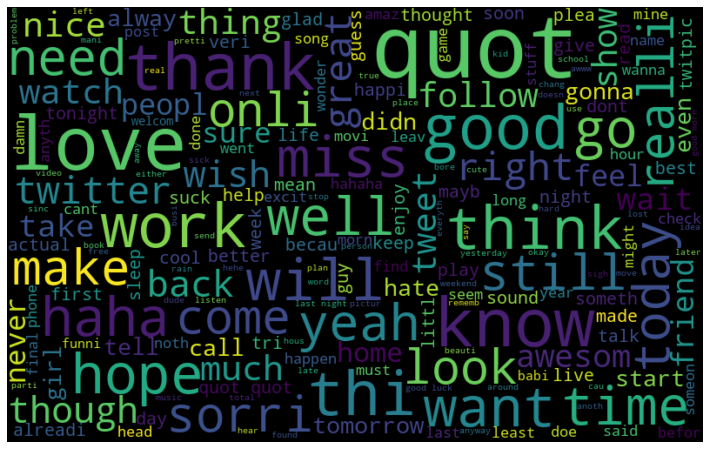

In [15]:
# visualize the clean_tweet column now
words = " ".join([sentence for sentence in df1['clean_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

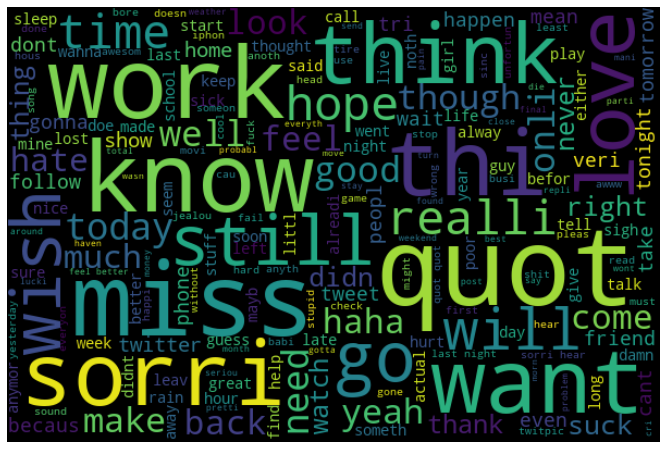

In [16]:
# wordplot for negative words which is 0 in the dataset
words = " ".join([sentence for sentence in df1['clean_tweet'][df1['Sentiment']==0]])

wordcloud = WordCloud(width=600, height=400, random_state=11, max_font_size=100).generate(words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

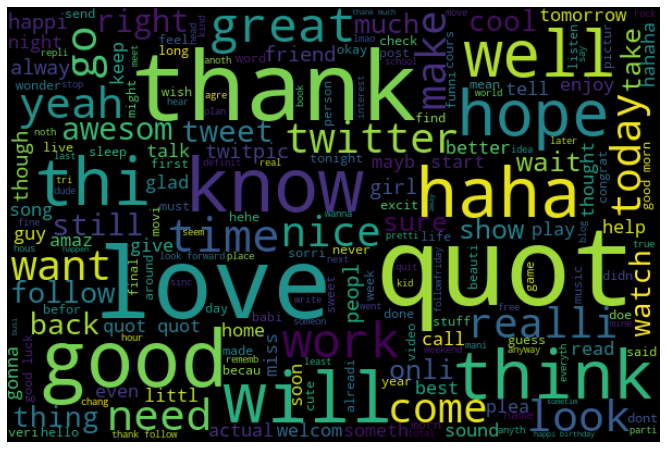

In [17]:
# wordplot for positive words which is 1 in the dataset
words = " ".join([sentence for sentence in df1['clean_tweet'][df1['Sentiment']==1]])

wordcloud = WordCloud(width=600, height=400, random_state=11, max_font_size=100).generate(words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [18]:
# extracting all the hastag to know what particular the tweet is about.
def hashtag_extract(tweets):
    hashtags = []
    # loop words in the tweet
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht) #adding it to the lists
    return hashtags   

In [19]:
# extract hashtags from negative tweets
ht_negative = hashtag_extract(df1['clean_tweet'][df1['Sentiment']==0])

# extract hashtags from positive tweets
ht_positive = hashtag_extract(df1['clean_tweet'][df1['Sentiment']==1])

In [20]:
ht_positive[:10]

[[], [], [], [], [], [], [], [], [], []]

In [21]:
# this is used to combine all the words in a single list
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])

In [22]:
ht_positive[:5]


['poemsund', 'video', 'robotpickuplin', 'skydiv', 'andyhurleyday']

In [23]:
ht_negative[:5]


['asylm', 'squarespac', 'susan', 'twenti', 'iphon']

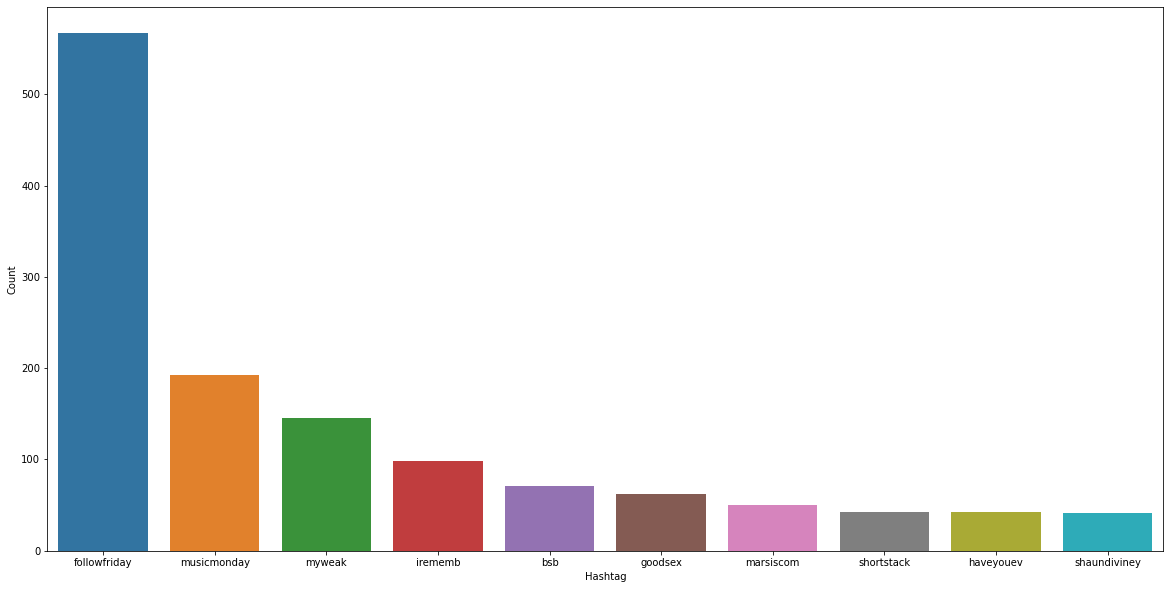

In [24]:
#using dictionary from nltk to process the tweets 

import nltk

a = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# finding the most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(20,10))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

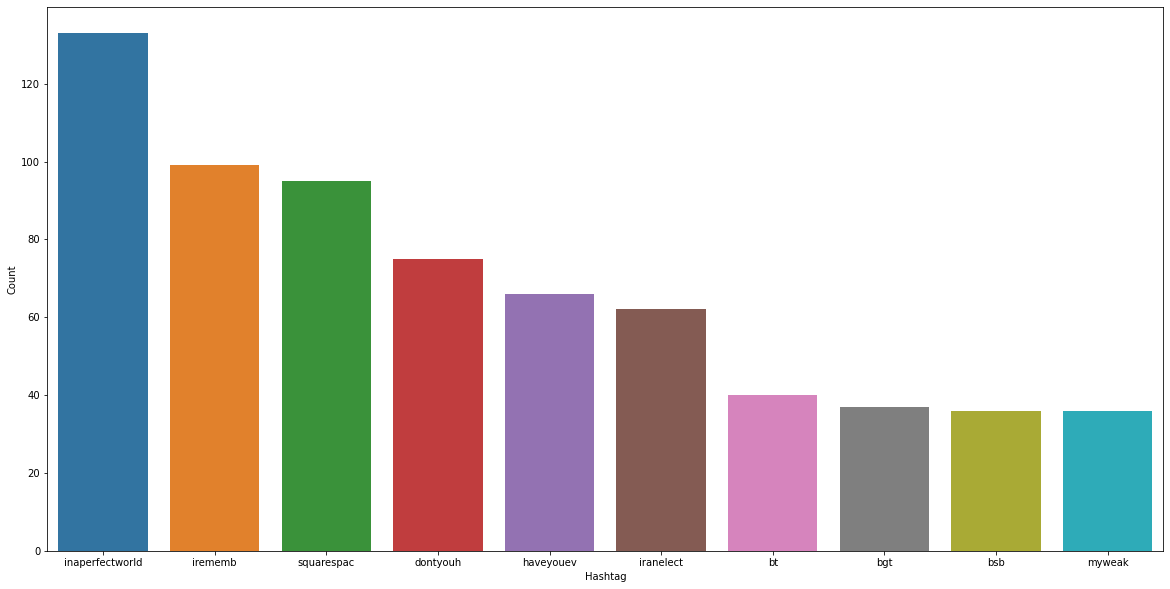

In [25]:
a = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# finding the most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(20,10))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [26]:
#creating bag of words


from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(df1['clean_tweet'])

In [31]:
#now applying logistic regression and cross validation in order to  train and test the data.


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
x_train, x_test, y_train, y_test = train_test_split(bow, df1['Sentiment'], random_state=31, test_size=0.2)

lr= LogisticRegression()
print(cross_val_score(lr,bow, df1['Sentiment'],cv=15,scoring = 'accuracy').mean())

0.7156387596749172


The accuracy obtained is 72%